# Linear equation systems

$ax + by = c$ 

$dx + ey = f$

In [1]:
import matplotlib.pyplot as plt

import numpy as np

## Example:

Solve:

$2x -3y = 1$ 

$4x + 5y = -2$

### 1. Graphic solution:

In [2]:
x = np.arange(-5, 5, 0.01)

In [3]:
y1 = (2*x - 1)/3

y2 = (-2 - 4*x)/5

In [4]:
Asign = np.sign(y2 -y1)

In [6]:
#print(Asign)

In [7]:
Adiff = np.diff(Asign)

In [9]:
#print(Adiff)

In [10]:
A_arg = np.argwhere(Adiff).flatten()

In [11]:
print(A_arg)

[495]


In [13]:
print(float(x[A_arg]), float(y1[A_arg]))

-0.050000000000105516 -0.36666666666673703


In [14]:
idx = np.argwhere(np.diff(np.sign(y2 - y1))).flatten()

In [15]:
print(float(x[idx]), float(y1[idx]))

-0.050000000000105516 -0.36666666666673703


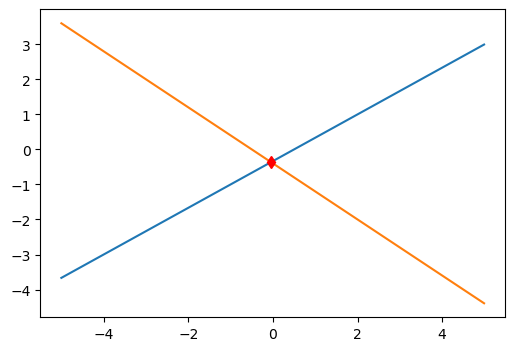

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y1)
ax.plot(x, y2)
ax.plot(x[idx], y1[idx], 'd', c = 'red')
plt.show()

### 2. Using Cramer's rule

In [18]:
def cramer_function(matrix, values): 
    
    # Determinant of the original function
    D = np.linalg.det(matrix)
    
    # Create matrices with columns containing alternating matrix + values
    matrix1 = np.array([values, matrix[:,1]])
    matrix2 = np.array([matrix[:,0], values])
    
    # Get determinants of both
    D1 = np.linalg.det(matrix1)
    D2 = np.linalg.det(matrix2)
    
    #finding the X1, X2, X3
    sol1 = D1/D
    sol2 = D2/D
    
    return sol1, sol2

In [19]:
M = np.array([[2, -3], [4, 5]])

In [21]:
print(M, M.shape)

[[ 2 -3]
 [ 4  5]] (2, 2)


In [23]:
v = np.array([1, -2])

In [24]:
sol1, sol2 = cramer_function(M, v)

In [25]:
print(sol1, sol2)

-0.04545454545454547 -0.3636363636363635


### 3. Matrix solution:

In [26]:
A = np.array([[2, -3], [4, 5]])

In [27]:
print(A)

[[ 2 -3]
 [ 4  5]]


In [28]:
B = np.array([[1], [-2]])

In [29]:
print(B)

[[ 1]
 [-2]]


In [30]:
invA = np.linalg.inv(A)

In [31]:
print(invA)

[[ 0.22727273  0.13636364]
 [-0.18181818  0.09090909]]


In [32]:
C = A @ invA

print(C)

[[1. 0.]
 [0. 1.]]


In [33]:
X = invA.dot(B)

In [34]:
print(X)

[[-0.04545455]
 [-0.36363636]]


In [35]:
X1 = invA @ B

In [36]:
print(X1)

[[-0.04545455]
 [-0.36363636]]


## Example 2:

Solve: 

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x -5y + 2z = -4$

In [37]:
# Let's define a function:

def f1(x, y):  # Which we can call later on
    return (-4*x - 3*y + 25)/2 # Must be indented

def f2(x, y):  # Which we can call later on
    return (+2*x - 2*y - 10)/3 # Must be indented

def f3(x, y):  # Which we can call later on
    return (-3*x + 5*y - 4)/2 # Must be indented

In [38]:
x = np.linspace(-10, 10, 30)  # Define x coordinates
y = np.linspace(-10, 10, 30)  # Define y coordinates

X, Y = np.meshgrid(x, y)  #Create the grid, i.e., from vector coordinates, it generates a matrix of coordinates

In [39]:
Z1 = f1(X, Y) # Call function and get Z
Z2 = f2(X, Y) # Call function and get Z
Z3 = f3(X, Y) # Call function and get Z

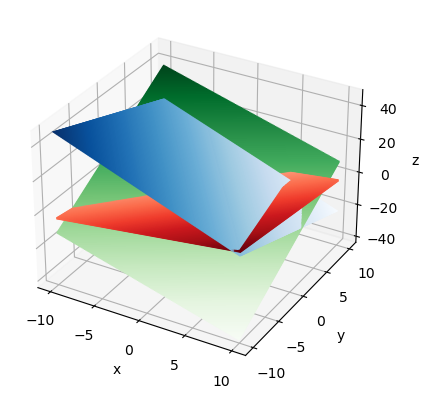

In [42]:
# Now we do some plotting:
fig = plt.figure()

ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z1, 500, cmap='Blues') # Creates 'n=100' contours at different Z to make the surface
ax.contour3D(X, Y, Z2, 500, cmap='Reds') # Creates 'n=100' contours at different Z to make the surface
ax.contour3D(X, Y, Z3, 500, cmap='Greens') # Creates 'n=100' contours at different Z to make the surface

ax.set_xlabel('x')  # Customised labels for axes
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

## MATRIX SOLUTION

In [43]:
A = np.array([[4, 3, 2], [-2, 2, 3], [3, -5, 2]])

In [44]:
print(A)

[[ 4  3  2]
 [-2  2  3]
 [ 3 -5  2]]


In [45]:
B = np.array([25, -10, -4])

In [47]:
print(B)

[ 25 -10  -4]


In [48]:
X = np.linalg.inv(A).dot(B)
print(X)

[ 5.  3. -2.]


## Symbolic algebra (sympy)

#### Documentation:
https://www.sympy.org/en/index.html


#### About Sympy:
SymPy is a Python library for symbolic mathematics. It aims to become a full-featured computer algebra system (CAS) while keeping the code as simple as possible in order to be comprehensible and easily extensible. SymPy is written entirely in Python.

conda install sympy

In [49]:
import sympy as sp
from sympy.solvers.solveset import linsolve

Solve: 

$4x + 3y + 2z = 25$

$-2x + 2y + 3z = -10$

$3x -5y + 2z = -4$

In [50]:
x, y, z = sp.symbols('x, y, z')

### a) List of equations:

In [51]:
solution = linsolve([4*x + 3*y + 2*z - 25, -2*x + 2*y + 3*z + 10, 3*x - 5*y + 2*z + 4], (x, y, z))

print(solution)

{(5, 3, -2)}


### b) Using an augmented matrix:

In [52]:
solution2 = linsolve(sp.Matrix(([4, 3, 2, 25], [-2, 2, 3, -10], [3, -5, 2, -4])), (x, y, z))

print(solution2)

{(5, 3, -2)}


### c) Using a numpy-like matrix (A*x = b) form

In [53]:
M = sp.Matrix(([4, 3, 2, 25], [-2, 2, 3, -10], [3, -5, 2, -4]))

system = A, b = M[:, :-1], M[:, -1]

In [54]:
solution3 = linsolve(system, x, y, z)

print(solution3)

{(5, 3, -2)}
